# MIDRC Open-R1 Clinical Data

*Please note: This notebook uses open access data*

##### Created By: J Montgomery Maxwell

In this notebook we will visualize the distribution of subjects accross a variety demographics and their COVID-19 status in the Open-R1 dataset from The Medical Imaging and Data Resource Center. (MIDRC - https://data.midrc.org/)

The Open-R1 data set has 1,169 subjects, this notebook will compare the distribution of COVID-19 positive and negative patients across multiple demographic classes. In particular we will focus on the subjects' age groups (-20, 21-30, ..., 90+), sex (Male or Female), race (Black or African American, White, Asian, Pacific Islander, American Indian, Other, or Not Reported), and whether the subject is Hispanic or Latino. Below is a subset of the dataset.

In [ ]:
!pip install -I gen3==4.13.0 --user
!pip install matplotlib
!pip install scipy
!pip install sklearn

In [2]:
import gen3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
def age_group(agelist):
    min_age = min(agelist)
    groups = ["-20 yr", "21-30 yr", "31-40 yr", "41-50 yr", "51-60 yr", "61-70 yr", "71-80 yr", "81-90 yr", "90+ yr"]
    grouplist = []
    for i in agelist:
        if i <= 20:
            grouplist.append(groups[0])
        elif i <= 30:
            grouplist.append(groups[1])
        elif i <= 40:
            grouplist.append(groups[2])
        elif i <= 50:
            grouplist.append(groups[3])
        elif i <= 60:
            grouplist.append(groups[4])
        elif i <= 70:
            grouplist.append(groups[5])
        elif i <= 80:
            grouplist.append(groups[6])
        elif i <= 90:
            grouplist.append(groups[7])
        else:
            grouplist.append(groups[8])
            
    return grouplist

def percent_representation(df, demographic_type, demographics):

    positive_df = df[df['covid19_positive'] == 'Yes']
    negative_df = df[df['covid19_positive'] == 'No']
    
    neg_percents = []
    pos_percents = []
    for demo in demographics:
        neg_percents.append(round(len(negative_df[negative_df[demographic_type] == demo])/len(negative_df), 4)*100)
        pos_percents.append(round(len(positive_df[positive_df[demographic_type] == demo])/len(positive_df), 4)*100)
        
    neg = pd.DataFrame()
    pos = pd.DataFrame()     
    
    neg[demographic_type] = demographics
    neg['Percent'] = neg_percents
    neg['COVID-19 Status'] = 'Negative'
    
    pos[demographic_type] = demographics
    pos['Percent'] = pos_percents
    pos['COVID-19 Status'] = 'Positive'
        
    return pd.concat([neg, pos])

In [4]:
!gen3 drs-pull object dg.MD1R/2e3b3d14-bac8-4d84-a119-f452df3b33ac

[2022-08-19 04:14:19,737][WARNING] Unable to write access token to cache file. Exceeded number of retries.


In [5]:
df = pd.read_csv('MIDRC_Open_R1_case.tsv', sep='\t')
df['zip'] = df['zip'].astype(str)
df['age_group'] = age_group(df['age_at_index'])

df.loc[df.race == 'Native Hawaiian or other Pacific Islander', 'race'] = 'Pacific Islander'
df.loc[df.race == 'American Indian or Alaskan Native', 'race'] = 'American Indian' 
df.loc[df.race == 'Black or African American', 'race'] = 'Black or A.A.' 
df = df[['covid19_positive', 'age_group', 'sex', 'ethnicity', 'race']]
df.head()

,covid19_positive,age_group,sex,ethnicity,race
0,No,71-80 yr,Male,Not Hispanic or Latino,White
1,No,51-60 yr,Male,Not Hispanic or Latino,Black or A.A.
2,No,41-50 yr,Male,Not Hispanic or Latino,Black or A.A.
3,No,71-80 yr,Male,Not Hispanic or Latino,Other
4,No,31-40 yr,Male,Not Hispanic or Latino,Asian


### Subjects' COVID-19 Status

Approximately 17% of the subjects in the Open-R1 dataset were COVID-19 positive at the time of the dataset indexing. 

In [6]:
covid_breakdown = {'Number of COVID-19 positive subjects': len(df[df['covid19_positive'] == 'Yes']['covid19_positive']), 
                   'Number of COVID-19 negative subjects': len(df[df['covid19_positive'] == 'No']['covid19_positive']), }
covid_breakdown

{'Number of COVID-19 positive subjects': 203,
 'Number of COVID-19 negative subjects': 966}

## Subject Distribution

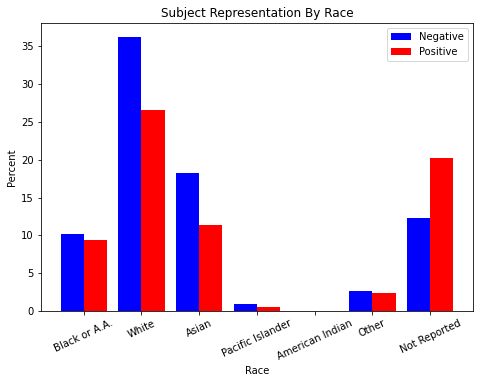

In [7]:
races = ['Black or A.A.', 
         'White', 
         'Asian', 
         'Pacific Islander', 
         'American Indian', 
         'Other', 
         'Not Reported']
plot_df = percent_representation(df, 'race', races)
X = np.arange(len(races))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X - 0.2, plot_df[plot_df['COVID-19 Status'] == 'Negative']['Percent'], color='b', width=0.4, label='Negative')
ax.bar(X + 0.2, plot_df[plot_df['COVID-19 Status'] == 'Positive']['Percent'], color='r', width=0.4, label='Positive')

ax.set_xticks(X)
ax.set_xticklabels(races, rotation=25)
ax.set_ylabel('Percent')
ax.set_xlabel('Race')
ax.set_title('Subject Representation By Race')

ax.legend()
plt.show()  

Here we can see that the number of Black and African American (A.A.) subjects are nearly evenly represented amongst both COVID-19 positve and negative populations, while White and Asian subjects are significantly under represented amongst the COVID-19 positive population. Additionally the number of subjects who chose not to report their race (Not Reported) was much higher amongst the COVID-19 positive population.

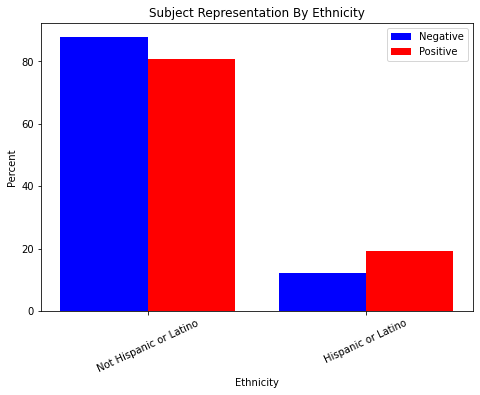

In [8]:
ethnicities = ['Not Hispanic or Latino', 'Hispanic or Latino'] 

plot_df = percent_representation(df, 'ethnicity', ethnicities)
X = np.arange(len(ethnicities))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X - 0.2, plot_df[plot_df['COVID-19 Status'] == 'Negative']['Percent'], color='b', width=0.4, label='Negative')
ax.bar(X + 0.2, plot_df[plot_df['COVID-19 Status'] == 'Positive']['Percent'], color='r', width=0.4, label='Positive')

ax.set_xticks(X)
ax.set_xticklabels(ethnicities, rotation=25)
ax.set_ylabel('Percent')
ax.set_xlabel('Ethnicity')
ax.set_title('Subject Representation By Ethnicity')

ax.legend()
plt.show()  

Hispanic and Latino subjects are slightly over represented amongst COVID-19 positive population and slightly under represented in the COVID-19 negative population.

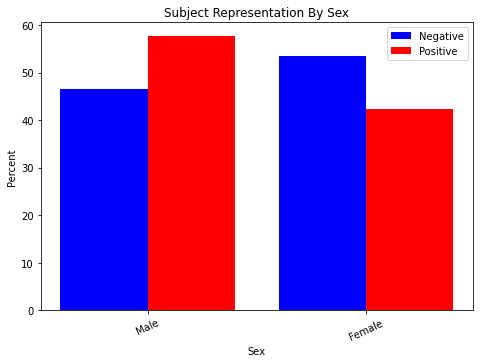

In [9]:
sexes = ['Male', 'Female'] 

plot_df = percent_representation(df, 'sex', sexes)
X = np.arange(len(sexes))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X - 0.2, plot_df[plot_df['COVID-19 Status'] == 'Negative']['Percent'], color='b', width=0.4, label='Negative')
ax.bar(X + 0.2, plot_df[plot_df['COVID-19 Status'] == 'Positive']['Percent'], color='r', width=0.4, label='Positive')

ax.set_xticks(X)
ax.set_xticklabels(sexes, rotation=25)
ax.set_ylabel('Percent')
ax.set_xlabel('Sex')
ax.set_title('Subject Representation By Sex')

ax.legend()
plt.show()  

The majority of the COVID-19 postive subjects are male and the majority of COVID-19 negative subjects are female.

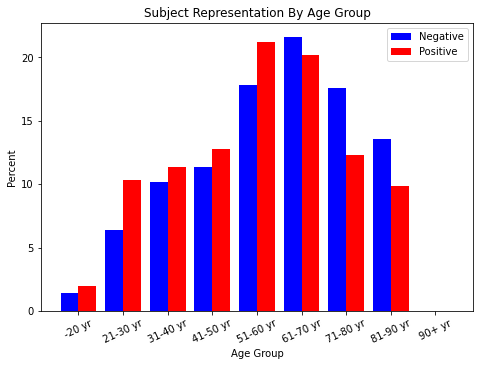

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ages = ["-20 yr", "21-30 yr", "31-40 yr", "41-50 yr", "51-60 yr", "61-70 yr", "71-80 yr", "81-90 yr", "90+ yr"]

plot_df = percent_representation(df, 'age_group', ages)
X=np.arange(9)

ax.bar(X - 0.2, 
       plot_df[plot_df['COVID-19 Status'] == 'Negative']['Percent'], color='b', width=0.4, label='Negative')

ax.bar(X + 0.2, 
       plot_df[plot_df['COVID-19 Status'] == 'Positive']['Percent'], color='r', width=0.4, label='Positive')
ax.set_xticks(X)
ax.set_xticklabels(ages, rotation=25)

ax.set_ylabel('Percent')
ax.set_xlabel('Age Group')

ax.set_title('Subject Representation By Age Group')

ax.legend()
plt.show()        

The majority of COVID-19 positive subjects are between the ages of 51 and 70, while the COVID-19 negative subjects are more evenly distributed between the 51-60, 61-70, and 71-80 age groups. The COVID-19 positive and negative subjects appear to be nearly evenly represented accross most of the age groups with the exception of the 71-80 and 81-90 year old age group which have a much higher proportion of COVID-19 negative subjects.